# BANK APP REVIEWS - BOA

In [451]:
#auto loading
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 🧱 1. Setup & Imports

In [452]:
import warnings
import pandas as pd
from data.data_quality_utils import DataQualityUtils
from data.load_data import load_local_data
from visualization.visualizer import ReviewVisualizer

In [453]:
warnings.filterwarnings("ignore")

In [454]:
# variable
BANK="BOA"

In [455]:
#paths
RAW_DATA_PATH='../../data/raw/'+BANK+'_raw_reviews.csv'
CLEANED_DATA_PATH='../../data/interim/'+BANK+'_cleaned_reviews.csv'

### 📌 Project Overview

#### CBE APP Reviews


## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [456]:
# Load the stock news sentiment data
df = load_local_data(RAW_DATA_PATH,)
df.head()

INFO:data.load_data:Loading data from: /home/teshager/Documents/10Academy/repositories/projects/customer-experience-analytics-for-fintech-apps/data/raw/BOA_raw_reviews.csv (type=csv)
INFO:data.load_data:Data loaded successfully. Shape: (1000, 10)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,3559b91c-fad9-4032-bebe-cf99974b9628,Robel Alebachew,https://play-lh.googleusercontent.com/a/ACg8oc...,"Hello, I’m facing a problem with the BOA Mobil...",1,0,NaN,2025-06-03 16:21:34,NaN,NaN
1,10e85f30-540d-4810-ba89-85a7e004480b,Haymanot Anberber,https://play-lh.googleusercontent.com/a/ACg8oc...,exceptional,5,0,NaN,2025-06-03 10:32:35,NaN,NaN
2,d7f07898-4ba1-47b4-9e8c-a3cc10b1bf0f,Mohamed Abdillahi,https://play-lh.googleusercontent.com/a-/ALV-U...,BoA Mobile good bank,5,0,25.05.03,2025-06-02 14:25:12,NaN,NaN
3,2ca9480b-ff5f-4b59-952c-5921db83dab2,Ahadu tech,https://play-lh.googleusercontent.com/a-/ALV-U...,this is worest app 24/7 loading,1,0,25.05.03,2025-06-01 15:51:10,NaN,NaN
4,8cd852da-0257-4ca0-9003-314fb464e55a,Fentaw Kefyalew,https://play-lh.googleusercontent.com/a-/ALV-U...,This App is not interest for Android phone Ple...,1,0,NaN,2025-06-01 10:17:10,NaN,NaN


### Dataset Overview

In [457]:
#view sample data
df.sample(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
646,c3c57420-55b1-4d02-956b-cbdc55b33e41,Gezahegn Asrat,https://play-lh.googleusercontent.com/a-/ALV-U...,"After last update, the app keeps crashing, not...",1,12,24.04.26,2024-05-02 09:10:03,NaN,NaN
439,f402174e-b7fe-45b9-9140-7648c19fdd33,Getachew Melaku,https://play-lh.googleusercontent.com/a/ACg8oc...,Please make it functional.,5,1,24.05.07,2024-07-03 22:38:48,NaN,NaN
794,df2f10e0-7210-43b3-9d7d-4868e4edb0e8,fetu Zeyne,https://play-lh.googleusercontent.com/a-/ALV-U...,Good app,5,1,24.02.07,2024-04-18 04:02:08,NaN,NaN
103,9b460da8-c607-47ba-89a3-76896c16c1e4,Huzeyfa Jemal,https://play-lh.googleusercontent.com/a/ACg8oc...,Best bank,5,1,24.09.30,2025-02-08 11:08:52,NaN,NaN
713,54b35b06-8d9f-426d-b60e-8ca7759b37f3,Kindalem Melak,https://play-lh.googleusercontent.com/a/ACg8oc...,This application is relatively good even if so...,5,5,24.04.22,2024-04-28 20:08:25,NaN,NaN
896,66fafa2a-e28c-44d1-a7ce-dec09bb3c929,Yohannes Fikru,https://play-lh.googleusercontent.com/a/ACg8oc...,This app is not efficient and can't be used fo...,1,39,24.02.07,2024-02-23 23:03:31,NaN,NaN
983,0c89b1e4-46b8-4f75-a940-16a94c3ebad0,Abdulmuiz Aman,https://play-lh.googleusercontent.com/a/ACg8oc...,best one,5,1,24.01.09,2024-02-04 21:15:55,NaN,NaN
754,b71cff61-9c89-4dbd-906c-9e430788ffbf,Loti Hassn,https://play-lh.googleusercontent.com/a/ACg8oc...,In Ethiopia pest Bank,5,1,NaN,2024-04-23 15:35:47,NaN,NaN
173,1756e606-985f-44eb-bab4-95bcf0848416,Hildana Endale,https://play-lh.googleusercontent.com/a/ACg8oc...,This application is losing major factions on a...,1,19,24.11.22,2024-11-28 10:17:48,NaN,NaN
425,9d157253-6414-46f1-a2f3-0867fbd3f25d,Abenezer Anemaw,https://play-lh.googleusercontent.com/a-/ALV-U...,"Pretty good for a banking app, it still lacks ...",5,14,NaN,2024-07-09 22:36:45,NaN,NaN


In [458]:
#see the last rows
df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
995,832b30a2-1ab9-476f-838d-e96b1f50da03,Abebayehu mussa,https://play-lh.googleusercontent.com/a-/ALV-U...,Nice,5,2,24.01.09,2024-02-03 16:46:47,NaN,NaN
996,000ef73f-978b-4c50-a44a-9c57cbc5c69e,ww,https://play-lh.googleusercontent.com/a/ACg8oc...,A massive improvement from the previous app. M...,5,6,24.01.09,2024-02-03 13:04:16,NaN,NaN
997,a0cf0ff4-f795-42d9-ada0-e31effdbc5ab,Kassahun Berihun,https://play-lh.googleusercontent.com/a-/ALV-U...,Good,5,2,24.01.09,2024-02-03 12:47:25,NaN,NaN
998,e6c09bb3-ef33-47b7-99c3-3b6b20ea79b8,Beti Abreham,https://play-lh.googleusercontent.com/a/ACg8oc...,Boa,5,2,NaN,2024-02-03 12:24:09,NaN,NaN
999,5dc77553-7476-4699-bb51-50ad587ad7ba,Kings Man,https://play-lh.googleusercontent.com/a/ACg8oc...,Thank you,5,3,NaN,2024-02-03 11:46:03,NaN,NaN


In [459]:
#shape of the dataset
df.shape

(1000, 10)

In [460]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'],
      dtype='object')

## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [461]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1000.0,3.022,1.860908,1.0,1.0,3.0,5.0,5.0
thumbsUpCount,1000.0,9.118,74.268526,0.0,0.0,1.0,1.0,1805.0


In [462]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
reviewId,1000,1000,3559b91c-fad9-4032-bebe-cf99974b9628,1
userName,1000,994,Alexander Abebe,2
userImage,1000,999,https://play-lh.googleusercontent.com/a-/ALV-U...,2
content,1000,855,Good,43
reviewCreatedVersion,727,10,24.02.07,146
at,1000,1000,2025-06-03 16:21:34,1
replyContent,23,8,"Dear customer, We are sorry for the inconvenie...",8
repliedAt,23,23,2024-02-22 15:40:34,1


In [463]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              1000 non-null   object
 1   userName              1000 non-null   object
 2   userImage             1000 non-null   object
 3   content               1000 non-null   object
 4   score                 1000 non-null   int64 
 5   thumbsUpCount         1000 non-null   int64 
 6   reviewCreatedVersion  727 non-null    object
 7   at                    1000 non-null   object
 8   replyContent          23 non-null     object
 9   repliedAt             23 non-null     object
dtypes: int64(2), object(8)
memory usage: 78.2+ KB


In [464]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

reviewId                1000
at                      1000
userImage                999
userName                 994
content                  855
thumbsUpCount             52
repliedAt                 23
reviewCreatedVersion      10
replyContent               8
score                      5
dtype: int64

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [465]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [466]:
#count of missing values per column
dq.summary()

,#missing_values,percentage
replyContent,977,97.70%
repliedAt,977,97.70%
reviewCreatedVersion,273,27.30%
reviewId,0,0.00%
userName,0,0.00%
userImage,0,0.00%
content,0,0.00%
score,0,0.00%
thumbsUpCount,0,0.00%
at,0,0.00%


### Missing Values

In [467]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage
replyContent,977,97.70%
repliedAt,977,97.70%
reviewCreatedVersion,273,27.30%


### Duplicates

In [468]:
#count duplicates
dq.count_duplicates()

0

In [469]:
#look at the duplicates
dq.display_duplicates()

[INFO] Found 0 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt


### Invalid Values

In [470]:
dq.find_invalid_values()

{}

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [471]:
#saving the original dataset for later use
df_original=df.copy()

In [472]:
#drop duplicated rows
dq.drop_duplicates().sample(5)

[INFO] Dropped 0 duplicate row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
998,e6c09bb3-ef33-47b7-99c3-3b6b20ea79b8,Beti Abreham,https://play-lh.googleusercontent.com/a/ACg8oc...,Boa,5,2,NaN,2024-02-03 12:24:09,NaN,NaN
811,516c40dc-9a1e-4bd8-9c73-78272f1f5852,FITSUM TESFAYE,https://play-lh.googleusercontent.com/a-/ALV-U...,The most terrible mobel banking app in the wor...,1,0,NaN,2024-04-13 14:53:01,NaN,NaN
908,8c46cbaa-5512-405c-b03f-db69d3c520d2,እኔ መፅሐፍ ነኝ,https://play-lh.googleusercontent.com/a-/ALV-U...,Welcome BoA mobile,5,1,24.02.07,2024-02-21 22:03:00,NaN,NaN
672,a1d8f400-cdcd-4bae-8ea3-c18d55ac5967,Mulugeta Legesse,https://play-lh.googleusercontent.com/a-/ALV-U...,No feature works correctly. Its always bufferi...,2,0,NaN,2024-04-30 22:39:25,NaN,NaN
302,51aba586-a360-476f-8523-7772f8f56827,Bitanya Gebre,https://play-lh.googleusercontent.com/a/ACg8oc...,Betanya Gebre,3,0,24.07.04,2024-08-23 21:29:23,NaN,NaN


In [473]:
# Check for duplicates again after dropping
dq.display_duplicates()

[INFO] Found 0 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt


In [474]:
# Drop rows missing significant columns
dq.drop_rows_with_missing_in_columns(['content','score']).sample(5)

[INFO] Dropped 0 row(s) with missing values in columns: ['content', 'score']


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
19,7f2000c9-7d5a-4e34-92bd-f3871b54b93c,EYOB FASIL ALEMAYEHU,https://play-lh.googleusercontent.com/a/ACg8oc...,excellent app,4,0,NaN,2025-05-16 21:34:42,NaN,NaN
309,e7724869-421f-4e36-be90-104ea76feb33,Jemal Sirmolo,https://play-lh.googleusercontent.com/a/ACg8oc...,App isn't working,1,0,24.07.04,2024-08-18 20:48:13,NaN,NaN
268,72e37eb9-220e-4ebb-8068-a846c6c2ec45,Fasika alemenew Tades,https://play-lh.googleusercontent.com/a/ACg8oc...,የእርስዎን ተሞክሮ ይግለጹ (አማራጭ),5,1,24.07.04,2024-09-14 16:37:34,NaN,NaN
244,cd089947-bc9a-41cf-a17d-9bf390c91485,Adu delu,https://play-lh.googleusercontent.com/a/ACg8oc...,Worest app,1,0,24.09.30,2024-10-03 12:57:35,NaN,NaN
908,8c46cbaa-5512-405c-b03f-db69d3c520d2,እኔ መፅሐፍ ነኝ,https://play-lh.googleusercontent.com/a-/ALV-U...,Welcome BoA mobile,5,1,24.02.07,2024-02-21 22:03:00,NaN,NaN


In [475]:
#drop columns with no data
df=dq.drop_empty_columns()

[INFO] No completely empty columns found.


In [476]:
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage
replyContent,977,97.70%
repliedAt,977,97.70%
reviewCreatedVersion,273,27.30%


In [477]:
#drop the reviewid column - it is not useful for analysis
df = dq.drop_columns(['reviewId','userImage','reviewCreatedVersion','replyContent','repliedAt'])

[INFO] Dropped columns: ['reviewId', 'userImage', 'reviewCreatedVersion', 'replyContent', 'repliedAt']


In [478]:
dq.find_invalid_values()

{}

In [479]:
df=dq.replace_emojis_with_text("content")

[INFO] Replaced emojis with text equivalents in 'content' column.


In [480]:
df=await dq.translate_non_english_text("content")

INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=af&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=best "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=fr&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=exceptional "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=so&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=BoA+Mobile+good+bank "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=so&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=good "HTTP/2 200 OK"
INFO:httpx:HTTP Reque

In [481]:
df.shape

(1000, 5)

### Inconsistencies and Inaccuracies

In [482]:
#drop redundancies and clean column names
df=dq.drop_redundant_columns()

In [483]:
df=dq.convert_columns_to_datetime()

In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   userName       1000 non-null   object
 1   content        1000 non-null   object
 2   score          1000 non-null   int64 
 3   thumbsUpCount  1000 non-null   int64 
 4   at             1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [485]:
df.columns

Index(['userName', 'content', 'score', 'thumbsUpCount', 'at'], dtype='object')

In [486]:
#  df=df.rename(columns={"content": "review", "score": "rating", "at": "date"}, inplace=True)
df=dq.rename_and_prioritize_columns({"content": "review", "score": "rating", "at": "date"})

[INFO] Renamed columns: {'content': 'review', 'score': 'rating', 'at': 'date'}


In [487]:
df["bank"] = BANK  # add bank name column
df["source"] = "Google Store"  # add source column

In [488]:
df.sample(10)

,review,rating,date,userName,thumbsUpCount,bank,source
246,አሪፍ ነው በርቱልን,5,2024-10-03 01:53:27,Aman Abas,1,BOA,Google Store
376,Always slow and doesn't work on weekends if yo...,1,2024-07-23 18:53:32,Selamawit Belete,0,BOA,Google Store
886,More interactive and easy to use mobile app,5,2024-02-29 10:50:09,Yibeltal Meslie,8,BOA,Google Store
595,Good,5,2024-05-04 20:48:56,Kedir Takele,1,BOA,Google Store
305,Excellent app,5,2024-08-21 13:20:16,ephrem habtamu,1,BOA,Google Store
591,አሁን UPDATE የተደረገው APP ምንም ነው የማይሰራው መከራችንን እኮ ...,1,2024-05-05 13:22:17,Dagi The sulamati,0,BOA,Google Store
811,The most terrible mobel banking app in the wor...,1,2024-04-13 14:53:01,FITSUM TESFAYE,0,BOA,Google Store
769,very fast also nice app i love it,5,2024-04-22 18:13:09,Hani Mefu,1,BOA,Google Store
269,It's not working. It needs a big update. Can't...,1,2024-09-14 15:09:31,Esubalew 7822,0,BOA,Google Store
262,The worest app ever made i would not recommend...,1,2024-09-16 20:05:52,Meseret Kebede,0,BOA,Google Store


## 6. Analyze & Visualize

In [489]:
#instantiate the ReviewVisualizer class
viz = ReviewVisualizer(df)

[INFO] Saved plot: plots/wordcloud_reviews.png


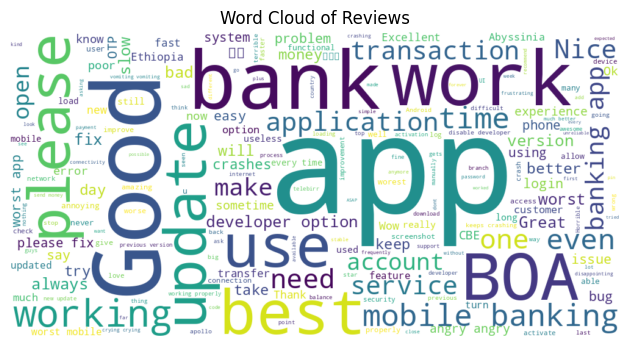

In [490]:
#Plot a word cloud of the reviews
viz.plot_wordcloud()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/rating_distribution.png


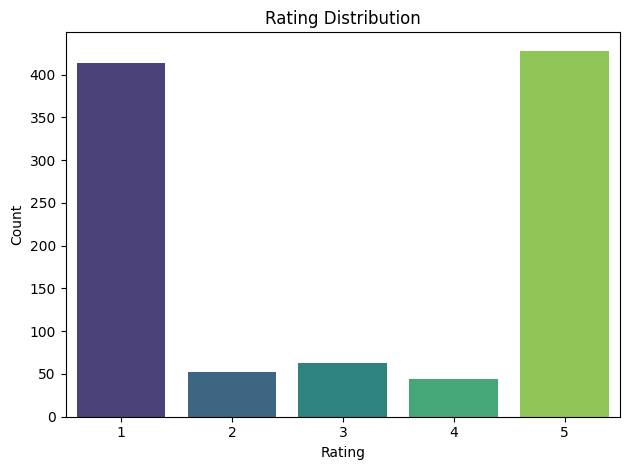

In [491]:
# Plot rating distribution
viz.plot_rating_distribution()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/thumbs_up_vs_rating.png


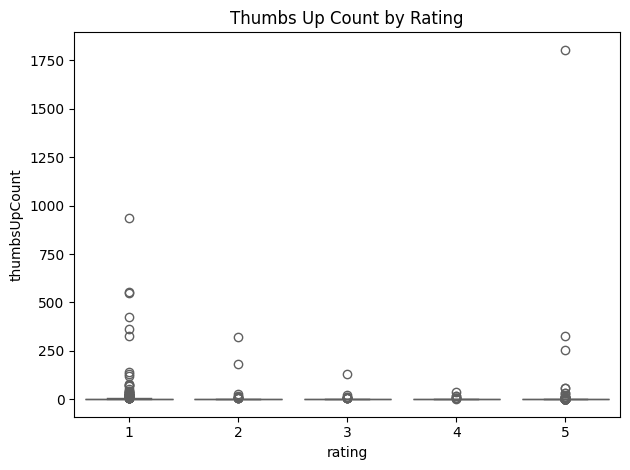

In [492]:
#Plot thumbs up against rating
viz.plot_thumbs_up_vs_rating()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/sentiment_vs_rating.png


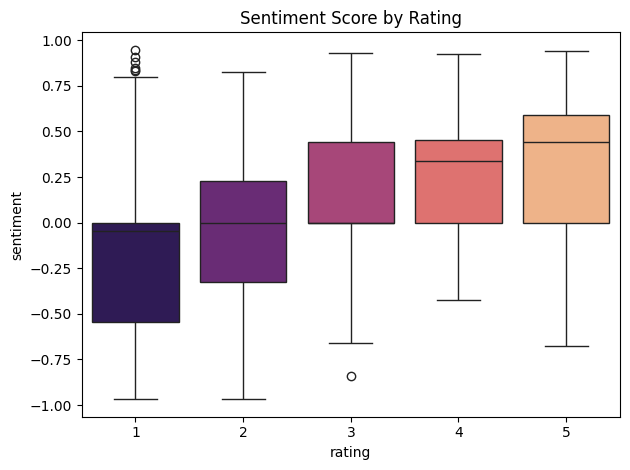

In [493]:
# Plot Sentiment against Ratin
viz.plot_sentiment_vs_rating()

In [494]:
df=dq.drop_columns(['userName','thumbsUpCount'])

[INFO] Dropped columns: ['userName', 'thumbsUpCount']


### Export Cleaned Data

In [495]:
# Save to csv
df.to_csv(CLEANED_DATA_PATH, index=False)

In [496]:
df.sample(15)

,review,rating,date,bank,source
375,FIX YOUR Apollo!! You guys where the best,1,2024-07-23 23:29:08,BOA,Google Store
112,I can't dijitalize my atm in the apollo app on...,1,2025-01-22 06:05:22,BOA,Google Store
971,I am having a challenge to use the app. The ap...,3,2024-02-06 19:31:28,BOA,Google Store
806,አሰ,1,2024-04-13 16:13:30,BOA,Google Store
121,Best,5,2025-01-14 11:14:00,BOA,Google Store
486,Wow! what a disgrace for BOA. The app barely w...,1,2024-06-03 23:56:20,BOA,Google Store
986,What about amarache ke fatnet even yemegerm le...,5,2024-02-04 11:14:40,BOA,Google Store
38,Yider,1,2025-04-18 00:18:40,BOA,Google Store
252,This app is incredibly frustrating to use. It’...,1,2024-09-26 21:13:35,BOA,Google Store
785,Not work this app ...what is the problem,1,2024-04-20 12:49:04,BOA,Google Store
